In [30]:
# From: https://en.wikipedia.org/w/index.php?title=List_of_world_records_in_Olympic_weightlifting&oldid=976512613
# World Standard interpolated points removed (an artifact of 2018 class redefinition.)
# Records maintained by IWF.
# 109+ / 87+ category replaced with actual body weight. Other athletes' weights closely matched weight class.

mens_world_records = """
Bodymass (kg)	Event	Record (kg)
55	Clean & Jerk	166 kg
55	Total	294 kg
61	Snatch	145 kg
61	Clean & Jerk	174 kg
61	Total	318 kg
67	Snatch	155 kg
67	Clean & Jerk	188 kg
67	Total	339 kg
73	Snatch	168 kg
73	Clean & Jerk	198 kg
73	Total	363 kg
81	Snatch	173 kg
81	Clean & Jerk	207 kg
81	Total	378 kg
96	Snatch	186 kg
96	Clean & Jerk	231 kg
96	Total	416 kg
109	Snatch	199 kg
109	Clean & Jerk	240 kg
109	Total	435 kg
167	Snatch	220 kg
167	Clean & Jerk	264 kg
167	Total	484 kg
"""

womens_world_records = """Bodymass (kg)	Event	Record (kg)
49	Snatch	95 kg
49	Clean & Jerk	118 kg
49	Total	212 kg
55	Snatch	102 kg
55	Clean & Jerk	129 kg
55	Total	227 kg
59	Snatch	107 kg
59	Clean & Jerk	140 kg
59	Total	246 kg
64	Snatch	117 kg
64	Clean & Jerk	145 kg
64	Total	261 kg
71	Clean & Jerk	152 kg
71	Total	267 kg
76	Snatch	124 kg
76	Clean & Jerk	156 kg
76	Total	278 kg
148	Snatch	147 kg
148	Clean & Jerk	186 kg
148	Total	332 kg"""

In [34]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [35]:
mens_records = pd.read_csv(StringIO(mens_world_records), sep="\t")
womens_records = pd.read_csv(StringIO(womens_world_records), sep="\t")

In [49]:
records = pd.concat([mens_records, womens_records])
records["Record (kg)"] = records["Record (kg)"].apply(lambda x: float(x[:-3]))
total = records[records["Event"] == "Total"]
snatch = records[records["Event"] == "Snatch"]
clean_jerk = records[records["Event"] == "Clean & Jerk"]

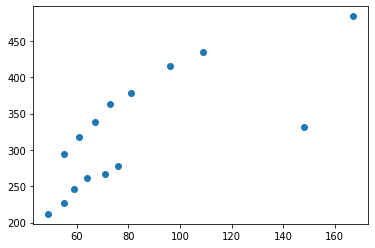

In [52]:
plt.scatter(total["Bodymass (kg)"], total["Record (kg)"])


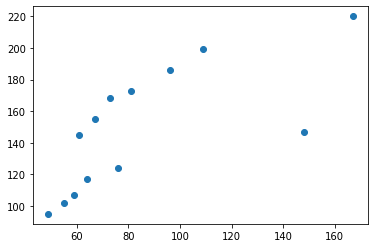

In [53]:
plt.scatter(snatch["Bodymass (kg)"], snatch["Record (kg)"])


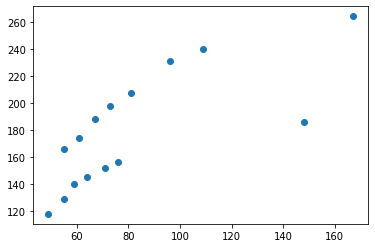

In [54]:
plt.scatter(clean_jerk["Bodymass (kg)"], clean_jerk["Record (kg)"])